In [1]:
#import necessary libraries
import pandas as pd
import numpy as np

In [2]:
config = {
    #the path for train.csv file
    'train_data_path' : "F:/UNI/Master's Degree/Term2/ML/Dr Rohban/HW/ML-HW3/4/ML2021S-HW3-data/train.csv",
    'test_data_path' : "F:/UNI/Master's Degree/Term2/ML/Dr Rohban/HW/ML-HW3/4/ML2021S-HW3-data/test.csv"
}

In [3]:
features_dict = {
    "Street" : {
        "Grvl" : 1,
        "Pave" : 2
    },
    "Alley" : {
        "NA" : 0,
        "Grvl" : 1,
        "Pave" : 2
    },
    "Utilities" : {
        "AllPub" : 4,
        "NoSewr" : 3,
        "NoSeWa" : 2,
        "ELO" : 1
    },
    "LandSlope" : {
        "Gtl" : 1,
        "Mod" : 2,
        "Sev" : 3
    },
    "ExterQual" : {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "Po" : 1
    },
    "ExterCond" : {
        "Ex" : 4,
        "Gd" : 3,
        "TA" : 2,
        "Fa" : 1,
        "Po" : 0
    },
    "BsmtQual" : {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "Po" : 1,
        "NA" : 0
    },
    "BsmtCond" : {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "Po" : 1,
        "NA" : 0
    },
    "BsmtExposure" : {
        "Gd" : 4,
        "Av" : 3,
        "Mn" : 2,
        "No" : 1,
        "NA" : 0
    },
    "BsmtFinType1" : {
        "GLQ" : 6,
        "ALQ" : 5,
        "BLQ" : 4,
        "Rec" : 3,
        "LwQ" : 2,
        "Unf" : 1,
        "NA" : 0
    },
    "BsmtFinType2" : {
        "GLQ" : 6,
        "ALQ" : 5,
        "BLQ" : 4,
        "Rec" : 3,
        "LwQ" : 2,
        "Unf" : 1,
        "NA" : 0
    },
    "HeatingQC" : {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "Po" : 1
    },
    "KitchenQual" : {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "Po" : 1
    },
    "FireplaceQu" : {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "Po" : 1,
        "NA" : 0
    },
    "GarageQual" : {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "Po" : 1,
        "NA" : 0
    },
    "GarageCond" : {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "Po" : 1,
        "NA" : 0
    },
    "PavedDrive" : {
        "Y" : 3,
        "P" : 2,
        "N" : 1
    },
    "PoolQC" : {
        "Ex" : 5,
        "Gd" : 4,
        "TA" : 3,
        "Fa" : 2,
        "NA" : 0
    },
    "Fence" : {
        "GdPrv" : 4,
        "MnPrv" : 3,
        "GdWo" : 2,
        "MnWw" : 1,
        "NA" : 0
    }
}

## Read Data

In [4]:
data = pd.read_csv(config['train_data_path'])
data = data.apply(lambda x: x.fillna("NA") if x.name in features_dict else x)
data_len = len(data)
train_data = data[:int(0.85*data_len)]
validation_data = data[int(0.85*data_len):]
test_data = pd.read_csv(config['test_data_path'])
test_data = test_data.apply(lambda x: x.fillna("NA") if x.name in features_dict else x)

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NaN,0,12,2008,WD,Normal,250000


## Drop some columns

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'
#columns with at least one "nan" value
null_data = train_data.isnull().sum().sort_values(ascending=False)
cols = null_data[null_data > 0].index.tolist()
for col in cols:
    if train_data[col].dtype == 'float64' or train_data[col].dtype == 'int64':
        train_data[col] = train_data[col].interpolate()
    else:
        train_data.drop(col , axis=1 , inplace=True)

In [7]:
#drop column "Id" because there is no meaning in this column
# train_data.drop('Id' , axis=1 , inplace=True)

In [8]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,0,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,0,12,2008,WD,Normal,250000


## Code Categorical Features

In [9]:
cat_codes = {} #a variable that keeps track of codes that we've set for categoricaal features
for y in train_data.columns:
    if(train_data[y].dtype == np.float64 or train_data[y].dtype == np.int64):
        train_data[y] = train_data[y].astype('float64') #if feature type is "int" , change it to "float"
    else:
        if y in features_dict:
            dictionary = features_dict[y]
        else:
            count = 1
            dictionary = {}
            for val in train_data[y].unique().tolist():
                dictionary[val] = count
                count = count + 1

        #replace values in the column using dictionary we've created for this feature 
        train_data[y] = train_data[y].map(dictionary).astype('float64')
        
        #save dictionary in a variable. because we need it when we are testing
        cat_codes[y] = dictionary

In [10]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,1.0,65.0,8450.0,2.0,0.0,1.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,1.0,1.0,208500.0
1,2.0,20.0,1.0,80.0,9600.0,2.0,0.0,1.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,1.0,1.0,181500.0
2,3.0,60.0,1.0,68.0,11250.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,1.0,1.0,223500.0
3,4.0,70.0,1.0,60.0,9550.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2006.0,1.0,2.0,140000.0
4,5.0,60.0,1.0,84.0,14260.0,2.0,0.0,2.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,1.0,1.0,250000.0


## Normalize Columns

In [11]:
#drop features that donsen't have correlation with label
corr = train_data.select_dtypes(include=[np.number]).corr()
a = 14
b = -3
good_cols = corr['SalePrice'].sort_values(ascending=False)[:a].index.tolist() + corr['SalePrice'].sort_values(ascending=False)[b:].index.tolist()
train_data = train_data[good_cols]

In [12]:
#drop label column
x_train = train_data.drop('SalePrice' , axis=1)

In [13]:
def minmax_scalar(col , test=False , vals=(0,0)):
    #"A function that normalizes columns with mapping values to the range [0 1]"
    #if we are testing , we should normalize using train scalars
    if test==True:
        rcol = (col - vals[0])/(vals[1]-vals[0])
        return rcol
    #otherwise we normalize and return min and max value of the column
    else:
        rcol = (col - col.min())/(col.max()-col.min())
        return rcol , col.min() , col.max()

In [14]:
#normalize columns using method "min max scalar"
min_max_values = {}
for col in x_train.columns:
    x_train[col] , s1 , s2 = minmax_scalar(x_train[col].to_numpy())
    min_max_values[col] = (s1 , s2)

In [15]:
#labels
y_train = train_data['SalePrice']

In [16]:
#convert data to numpy arrays
x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

In [17]:
x_train.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,BsmtQual,FullBath,TotRmsAbvGrd,YearBuilt,FireplaceQu,Electrical,CentralAir,Foundation
0,0.666667,0.316905,0.666667,0.666667,0.50,0.266999,0.394245,0.180373,0.8,0.666667,0.500000,0.948148,0.0,0.0,0.0,0.0
1,0.555556,0.213726,0.333333,0.333333,0.50,0.393637,0.330935,0.320663,0.8,0.666667,0.333333,0.748148,0.6,0.0,0.0,0.2
2,0.666667,0.334408,0.666667,0.666667,0.50,0.286962,0.437410,0.202488,0.8,0.666667,0.333333,0.933333,0.6,0.0,0.0,0.0
3,0.666667,0.318517,0.333333,0.666667,0.75,0.235808,0.461871,0.216655,0.6,0.333333,0.416667,0.296296,0.8,0.0,0.0,0.4
4,0.777778,0.429295,0.666667,0.666667,0.75,0.357143,0.601439,0.280235,0.8,0.666667,0.583333,0.925926,0.6,0.0,0.0,0.0


In [18]:
y_train.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

## Normalize Validation Set

In [19]:
#select columns of train data for validation data
x_validation = validation_data[x_train.columns.tolist()].copy()

for y in x_validation.columns:
    #map test features to correct form and code categorical data using array we've created above
    if(x_validation[y].dtype == np.float64 or x_validation[y].dtype == np.int64):
        x_validation[y] = x_validation[y].astype('float64')
    else:
        x_validation[y] = x_validation[y].map(cat_codes[y]).astype('float64')
    
    # apply "min max scalar" method on test data to normalize it
    x_validation[y] = minmax_scalar(x_validation[y].to_numpy() , True , min_max_values[y])

#fill null values with mean value of the columns
x_validation = x_validation.fillna(x_validation.mean())

## Normalize Test Set

In [20]:
#select columns of train data for test data
x_test = test_data[x_train.columns.tolist()].copy()

for y in x_test.columns:
    #map test features to correct form and code categorical data using array we've created above
    if(x_test[y].dtype == np.float64 or x_test[y].dtype == np.int64):
        x_test[y] = x_test[y].astype('float64')
    else:
        x_test[y] = x_test[y].map(cat_codes[y]).astype('float64')
    
    # apply "min max scalar" method on test data to normalize it
    x_test[y] = minmax_scalar(x_test[y].to_numpy() , True , min_max_values[y])

#fill null values with mean value of the columns
x_test = x_test.fillna(x_test.mean())

In [21]:
x_test.head()

,OverallQual,GrLivArea,ExterQual,KitchenQual,GarageCars,TotalBsmtSF,GarageArea,1stFlrSF,BsmtQual,FullBath,TotRmsAbvGrd,YearBuilt,FireplaceQu,Electrical,CentralAir,Foundation
0,0.444444,0.129433,0.333333,0.333333,0.25,0.275109,0.525180,0.194195,0.6,0.333333,0.250000,0.637037,0.0,0.0,0.0,0.2
1,0.555556,0.229157,0.333333,0.666667,0.25,0.414535,0.224460,0.343815,0.6,0.333333,0.333333,0.614815,0.0,0.0,0.0,0.2
2,0.444444,0.298250,0.333333,0.333333,0.50,0.289457,0.346763,0.205252,0.8,0.666667,0.333333,0.903704,0.6,0.0,0.0,0.0
3,0.555556,0.292492,0.333333,0.666667,0.50,0.288833,0.338129,0.204561,0.6,0.666667,0.416667,0.911111,0.8,0.0,0.0,0.0
4,0.777778,0.217872,0.666667,0.666667,0.50,0.399251,0.364029,0.326883,0.8,0.666667,0.250000,0.866667,0.0,0.0,0.0,0.0


## Define Kernel Functions

In [22]:
#kernel weight function
def weight(X , x , h , method="1"):
    #box kernel
    if method == "1":
         weight_vector = (np.linalg.norm(X - x , axis=1) <= h) * np.ones((len(X)))
    #gaussian kernel
    elif method == "2":
        weight_vector = 1/h/np.sqrt(2*np.pi) * np.exp(-(np.linalg.norm(X - x , axis=1))**2 / (2*h))
        
    sm = weight_vector.sum()
    if sm != 0:
        return (weight_vector * len(X)) / sm
    else:
        return (weight_vector * len(X)) / (sm + np.finfo(float).eps)

In [23]:
#prediction function
def perdict(weight_vector , y_vector):
    return np.dot(weight_vector , y_vector) / len(y_vector)

In [24]:
x_val_np = x_validation.to_numpy()
y_validation = validation_data['SalePrice'].to_numpy()

In [25]:
x_test_np = x_test.to_numpy()

## Try Box Kernel On Validation Set

In [26]:
#validate box kernel
hs = np.linspace(start=0 , stop=5 , num=100).tolist()
mses = []
for h in hs:
    mse = 0
    for i in range(len(x_val_np)):
        weight_vector = weight(x_train_np , x_val_np[i] , h , method='1')
        p = perdict(weight_vector , y_train_np)
        r = y_validation[i]
        mse = mse + (p-r)**2
    mses.append((1/len(x_val_np))*mse)

[Text(0.5, 0, 'h'), Text(0, 0.5, 'RMSE')]

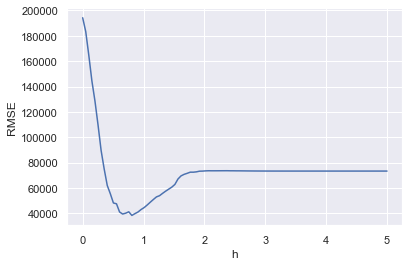

In [27]:
import seaborn as sns
sns.set_theme(style="darkgrid")

plt = sns.lineplot(x=hs, y=np.sqrt(np.array(mses)))
plt.set(xlabel=r'h', ylabel='RMSE')

In [28]:
#rmse for validation set with box kernel
np.sqrt(np.array(mses)).min()

38291.154115760095

## Try Gaussain Kernel On Validation Set

In [29]:
#test gaussian kernel
sigmas = np.linspace(start=0.001 , stop=0.1 , num=200).tolist()
mses_2 = []
for s in sigmas:
    mse = 0
    for i in range(len(x_val_np)):
        weight_vector = weight(x_train_np , x_val_np[i] , s , method='2')
        p = perdict(weight_vector , y_train_np)
        r = y_validation[i]
        mse = mse + (p-r)**2
    mses_2.append((1/len(x_val_np))*mse)

[Text(0.5, 0, '$\\sigma$'), Text(0, 0.5, 'RMSE')]

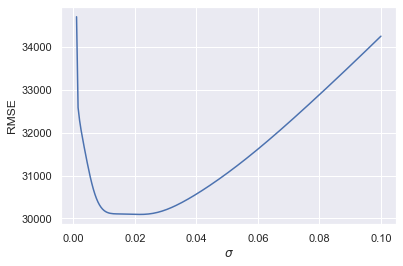

In [30]:
import seaborn as sns
sns.set_theme(style="darkgrid")

plt = sns.lineplot(x=sigmas, y=np.sqrt(np.array(mses_2)))
plt.set(xlabel='$\sigma$', ylabel='RMSE')

In [31]:
#rmse for validation set with gaussian kernel
np.sqrt(np.array(mses_2)).min()

30091.3102826168

## Generate Labels for test set

In [32]:
optimal_h = hs[np.argmin(np.sqrt(np.array(mses)))]
optimal_sigma = sigmas[np.argmin(np.sqrt(np.array(mses_2)))]

In [33]:
#box kernel
for i in range(len(x_test_np)):
    weight_vector = weight(x_train_np , x_test_np[i] , optimal_h , method='1')
    p = perdict(weight_vector , y_train_np)
    print(p)

135976.42025862072
145896.0529300567
187538.8663282572
204768.7668067227
186657.7925925926
190801.6552315609
159061.53401360544
197682.0354767184
172583.27876106196
138895.01026694046
207500.62214983712
135644.06581740975
136092.45341614904
187111.81072555206
142211.9146825397
289035.2532188842
210307.7203065134
270210.9246575342
269902.65993265994
376395.0410958904
259664.0029498525
229484.71685393254
179847.95175438598
181086.02696629212
218847.28865979382
221902.2057522124
258164.99197860964
250913.7032085562
185462.53693181818
231083.78728606354
187493.48936170214
98048.00000000001
172315.67042606516
239345.54838709673
233886.02044609663
235239.22781774588
182096.77014925372
174566.44077134985
174566.44077134985
169622.8005181347
171594.7564102564
173813.92485549132
254453.16501650165
221093.18181818182
228192.1425531915
161384.04954954956
215490.77443609023
209350.75742574257
147936.0705882353
147354.73756432245
151100.962585034
158760.66972477065
153188.7035775128
131033.27972027

215232.99831932774
273087.04150943394
283777.9105691057
166309.6784140969
271132.4578754579
183717.50293542075
253573.60126582277
166600.27060931898
222107.77358490566
218808.7258347979
174695.36906377203
192707.33676975945
144856.63047285465
300003.25892857136
191788.40670859537
248639.85037406484
154832.74616695062
135020.58351893097
147757.59646017698
135699.6914893617
136928.81742738592
143577.00922509225
155064.63414634147
153844.84293193716
213047.45495495494
322701.63157894736
290722.7256637168
288237.75708502025
355082.7126436781
279230.7078651686
265484.8102189781
268195.866894198
340673.64102564106
235744.97859922174
258900.31818181818
268450.875
284055.36595744675
224370.66094420603
289259.9112149533
230031.0634920635
230031.0634920635
180208.6599552573
225645.5807622505
230872.24175824175
223857.33182844243
220467.33568075113
221357.53215077604
228747.48086124405
225727.09450549455
205785.238178634
219092.3427895981
208015.28125
194691.82847341336
227266.62025316458
268956.

141604.78585858588
130365.55919395466
150195.87126865672
167229.2309859155
170645.62641509433
127020.9171270718
153221.8615664845
136117.30641821946
136133.65853658537
154216.42513863216
141521.76111111112
133279.11111111112
138104.79132231403
129828.67796610168
147786.27787610618
144501.98509933773
135980.3683127572
117397.54929577466
170262.012012012
145833.33333333334
136974.76610978524
120559.38285714287
168702.31754385965
134730.685106383
138648.65834932824
148193.77227722772
142485.42504743833
151340.81896551722
128621.00533333336
154647.83916083918
109102.875
135182.51362683435
141832.50245499183
129965.80579710146
132346.19554455447
94450.0
154956.16071428568
166211.77570093455
159543.41772151898
97879.25
131182.12941176468
133177.77777777778
161844.54183266935
128673.41379310343
136776.04244031833
160059.70212765958
183583.3333333333
121645.26842105263
119281.07692307692
121270.0
131139.3233256351
134466.86199095022
144967.93561368212
127281.85041551247
166950.5844155844
13030

In [34]:
#gaussian kernel
for i in range(len(x_test_np)):
    weight_vector = weight(x_train_np , x_test_np[i] , optimal_sigma , method='2')
    p = perdict(weight_vector , y_train_np)
    print(p)

127867.54767632965
135427.6442800842
176542.78712772488
194978.4804058169
194634.10323673053
177150.27268450218
166587.27639249287
177457.62950490104
164070.8286634724
126987.9811374085
209328.49909955618
115597.3485207197
117516.3714152546
179228.29001253136
124793.03081227117
388204.35855064844
229517.85526114053
319601.4704647552
318866.36286195373
535333.151237335
286644.9632414133
215849.26460116153
192234.49937126
189875.91241862025
195281.99563297746
206564.09625583372
306695.77406593546
268296.86214446597
192334.57992291413
212642.02597400823
190580.55505031746
86093.31930271076
170112.91678391426
284072.311976994
279583.61802312447
220423.77925595758
175709.7795612126
168740.14252445038
168740.14252445038
168436.82617125564
176183.46430352094
166952.53018756706
280170.0179738196
224121.83041294565
217889.0027707233
149172.73750250725
225443.59814281735
180252.7896119857
140945.4851764617
137478.77123634034
139644.38262166543
159728.30085120132
149241.872120523
130166.303288281

177382.3984933095
191884.0753523174
255712.83422121484
194634.10323673053
177813.13857015973
193993.0337110185
213531.19036614712
330856.4928172141
347230.4261926263
159820.26383814838
308122.03229416447
178865.22712215775
243599.77588994498
191238.64653155685
240393.7755032475
229027.7726339025
186043.30375465416
178399.06495488
134459.91584313905
298823.1864181242
173112.336154194
283695.3416349317
154164.68724289344
119748.77479317618
133883.48038508024
115481.40973471997
116503.47184688921
120446.52489813074
155425.80329567683
150547.30128625417
233339.14007500355
381645.9660975044
349978.07668256474
355300.5884970607
426447.3465594135
329492.5771882072
267883.4229767345
322535.77870825346
409653.9032350809
266144.5875525094
305619.4769743396
321386.7105253277
346540.0753608012
209389.67729902623
341095.80792394123
218221.78285850468
218221.78285850468
182733.139778925
235080.232711654
247183.7721128605
200974.2987113254
199254.52415067202
205155.03099651306
215275.17288763958
2090

115849.20751230646
156349.208018375
123126.96588371854
126390.88871221585
137410.13167852192
130325.17091276881
142891.71632568477
122889.86044837418
148360.86306930872
106698.18758846493
122866.89933764738
125746.43481205117
115269.70662151239
130151.66035796696
99699.66891080623
135389.06781555671
146786.30526867238
135683.50731252902
73791.29026334378
114017.47826011982
203695.1951299054
152815.22054662366
124869.35481716043
150894.04569896133
143625.91433990703
147438.65177490233
94596.84972742865
161276.83859006566
95426.16373284726
126202.43573642439
124836.08524006927
134552.63599001797
121237.16030169003
151371.66294304354
126640.80924752074
139102.2832388552
114723.371743072
130681.4671021464
135218.1426180124
121583.4215964689
139787.67739031115
103438.74433536474
101166.69772787933
185487.43644303142
164406.39936350656
176796.00852663533
129080.66347960716
124786.76907329798
177444.9057252659
98780.71457763494
126300.95365970163
162191.89763397895
129220.76753791737
145934.4